> ### EEE2020-04: Data Structures & Algorithms

# Assignment \# IV: Searching & Sorting

**<div style="text-align: right"> Due date: June 3, 2019. </div>** 
**<div style="text-align: right"> Please upload your file @ yscec by 9 PM. </div>** 
<div style="text-align: right"> Youngmin Oh(오영민): <a href="mailto:youngmin.oh@yonsei.ac.kr">youngmin.oh@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Sanghoon Lee(이상훈): <a href="mailto:sanghslee@yonsei.ac.kr">sanghslee@yonsei.ac.kr</a> </div>

-------------------------------


### *Assignment Instructions:*
1. Write a program implementing a particular algorithm to solve a given problem.
2. You can use both Korean and English for your report.
3. **Analyze the algorithm, theoretically and empirically.** 
4. **Report your results.**  
5. <span style="color:red">**DO NOT**</span> alter **any** sanity check codes.  
    - You must do assignments and labs yourself. 
    - <span style="color:red">**Do not copy any part of your friends’ code.**</span>
    - Otherwise, you will get a F grade.

-----------------

<h2><span style="color:blue">[2018142023] [조성민]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-06-02 14:05:55.280252


-------------------------------

### PROBLEM I: Hashing (30 Points)

Implement $\texttt{ChainHashTable}$ using basic $\texttt{List}$ .

> As mentioned in our Lecture notes,  
> (vanilla)HashTable requires <U>reshash technique</U> to prevent **collision** between items that have identical hash value(s).
>
> $\texttt{ChainHashTable}$ settles collision by allowing multiple items be carried in a single slot, namely **'Chaining'**.  
> Details can be found in our Lecture Note 10 p.47(collision), p.58-61(chaining).  

Specifically, we will exploit basic $\texttt{List}$ to implement $\texttt{ChainHashTable}$ in this problem.  

Inputs and outputs of $\texttt{ChainHashTable}$ are specified as follows:  
* <code>init()</code>: constructs an empty HashTable.
* <code>put(key, data)</code>: puts data in HashTable according to its given key value (and returns nothing).
* <code>hash_function(key, slot_size)</code>: returns hash value of given key value.
* <code>get(key)</code>: returns <U>all</U> data stored in HashTable under given key value.
* <code>\_\_len\_\_()</code>: returns total number of data in HashTable.
* <code>\_\_contains\_\_(data)</code>: returns boolean value indicating whether 'data' is in HashTable.
* <code>remove(data)</code>: deletes the data in HashTable (only if it exists).


> Additional Instructions and Tips:
> * When a new item is assigned to a slot, the <U>**latest**</U> item should be at the <U>**front**</U> of the list under its <code>key</code> value.
> * We will overload <code>\_\_contains\_\_</code> method in order to use <code>in</code>.  
> * Note that there is no 'slots' in $\texttt{ChainHashTable}$. 
> * You may assume that <code>key</code> value is always <code>int</code> type.

> For further study, refer to [HERE](https://ratsgo.github.io/data%20structure&algorithm/2017/10/25/hash/) for additional explanation about **Collision** and **Chaining**.

### Answer:

In [2]:
class ChainHashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [None]*size
            
    def put(self, key, data):
        hash_value=self.hash_function(key,len(self.table))
        if self.table[hash_value]==None:
            self.table[hash_value]=[data]
        else:
            current=self.table[hash_value]
            current.insert(0,data)   
    def hash_function(self, key, size):
        return key%size

    def get(self, key):
        address=self.hash_function(key,len(self.table))
        return self.table[address]

    def __len__(self):
        cnt=[0]*len(self.table)
        sum_n=0
        for i in range(len(self.table)):
            if self.table[i]!=None:
                cnt[i]=len(self.table[i])
        for j in cnt:
            sum_n+=j
        return sum_n
    
    def __contains__(self, data):
        h=self.table
        found=False
        i=0
        while i<len(h) and not found:
            if h[i]==None:
                i+=1
            else:
                j=0
                while j<len(h[i]) and not found:
                    if h[i][j]==data:
                        found=True
                    else:
                        j+=1
                i+=1
        return found
    
    def remove(self, data):
        h=self.table
        found=False
        i=0
        while i<len(h) and not found:
            if h[i]==None:
                i+=1
            else:
                j=0
                while j<len(h[i]) and not found:
                    if h[i][j]==data:
                        found=True
                    else:
                        j+=1
                i+=1
    
        if found:
            i-=1
            current=h[i]
            if len(current)==1:
                current=None
            else:
                current.remove(data)
        else:
            print('Not Found')
               
    def __getitem__(self, key):
        return self.get(key)
                   
    def __setitem__(self, key, data):
        self.put(key, data)
        

In [3]:
### sanity check code ###
h = ChainHashTable()

h[57] = 'nike'; h[1] = 'horse'; h[42] = 'lion'; h[121] = 'zebra'; h[51] = 'giraffe'; h[2] = 'cat'; h[152] = 'jaguar'; h[44] = 'bentley'; h[94] = 'jaguar'
h[3] = 'dog'; h[5213] = 'retriever'; h[43] = 'maltese'; h[7] = 'sports'; h[4] = 'car'; h[64] = 'porsche'; h[97] = 'adidas'

print('-----------sanity check-------------')
print('')

print(h.table)
print('check hash function(9):',h.hash_function(19, 10))
print('length of h(16):', len(h))
print('True:', 'bentley' in h)
print('False:', 'puma' in h)
h.remove('bentley')
h.remove('maltese')
print(h.table)
print('length of h(14):', len(h))
print('True:', 'porsche' in h)
print('True:', 'jaguar' in h)
print('False:', 'puma' in h)

-----------sanity check-------------

[None, ['giraffe', 'zebra', 'horse'], ['jaguar', 'cat', 'lion'], ['maltese', 'retriever', 'dog'], ['porsche', 'car', 'jaguar', 'bentley'], None, None, ['adidas', 'sports', 'nike'], None, None]
check hash function(9): 9
length of h(16): 16
True: True
False: False
[None, ['giraffe', 'zebra', 'horse'], ['jaguar', 'cat', 'lion'], ['retriever', 'dog'], ['porsche', 'car', 'jaguar'], None, None, ['adidas', 'sports', 'nike'], None, None]
length of h(14): 14
True: True
True: True
False: False


### Description:

우선 HashTable을 크기 10으로 하여 모든 원소가 None인 배열을 만들어준다. hash_function 함수를 통해 몇번째 배열에 원소를 넣을 것인지를 정한다. put 함수에서는 key와 data값을 입력받아 key에 해당되는 배열의 hash_value를 정하고 만약 그 자리에 원소가 None일 경우 data를 그냥 넣어주고, 그렇지 않을 경우 0번째 자리에 insert해준다. get 함수를 통해 key값에 해당하는 data값을 불러온다. __len__ 함수를 통해 존재하는 원소들의 수를 불러온다. __contains__ 함수를 통해 data 존재에 대한 유무를 확인한다. remove함수를 통해 해당 data값을 지운다. __getitem__ 함수를 통해 해당 key에 있는 data값을 불러온다. __setitem__ 함수를 통해 지정한 key값에 data값을 넣어준다.

-----------------

### PROBLEM II: Sorting I (30 Points)

Suppose you are now a data scientist and given $\underline{N}$ points in a 2-D Cartesian Coordinate System from your experiment. 
<br>
<br>
To analyze this data, You want to SORT them in $\texttt{ascending}$ order of 'X' coordinates.
If there are the same 'X' coordinates points, You dicide to sort them in $\texttt{desending}$ order of 'Y' coordinates.
> For example, given (0,1) , (1, 2) , (-3, 5) , (0, 11)
$\rightarrow$ (-3, 5) , (0, 11) , (0, 1) , (1, 2)


<br>
<br>

To this end,
- Implement $\texttt{(1) Bubble Sort}$ , $\texttt{(2) Insertion Sort}$ and $\texttt{(3) Merge Sort}$
- Compare their $\texttt{Complexity}$ by plotting the graphs $\underline{Elapsed\;time}$ versus $\underline{N}$ 
- Discuss your results

<br>
$\mathbf{NOTICE}$ : Do Not Use any pre-built Sorting Library. ( e.g. sorted() or numpy.sort() ) 

### Answer:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

class Sorting():
    def __init__(self):
        pass
    def __gen_coords__(self, N=10):
        return np.random.randint(-N,N,(N,2))
    def bubble_sort(self, coords):
        for pass_num in range(len(coords)-1,0,-1):
            for i in range(pass_num):
                if coords[i][0]>coords[i+1][0]:
                    A=coords[i].copy()
                    B=coords[i+1].copy()
                    coords[i]=B
                    coords[i+1]=A
                if coords[i][0]==coords[i+1][0] and coords[i][1]<coords[i+1][1]:
                    A=coords[i].copy()
                    B=coords[i+1].copy()
                    coords[i]=B
                    coords[i+1]=A
        return coords
    def insert_sort(self, coords):
        for index in range(1,len(coords)):
            current_data=coords[index].copy()
            position=index
            while position>0:
                if coords[position-1][0]>current_data[0]:
                    A=coords[position-1].copy()
                    coords[position]=A
                    position-=1
                
                if coords[position-1][0]<current_data[0]:
                    break
                    
                if coords[position-1][0]==current_data[0]:
                    if coords[position-1][1]<current_data[1]:
                        A=coords[position-1].copy()
                        coords[position]=A
                        position-=1
                    else:
                        break
                    
            coords[position]=current_data
        return coords
    def merge_sort(self, coords):
        if len(coords)>1:
            mid=len(coords)//2
            left_half=coords[:mid].copy()
            right_half=coords[mid:].copy()
            self.merge_sort(left_half)
            self.merge_sort(right_half)

            i=0
            j=0
            k=0
        
           
            while i<len(left_half) and j<len(right_half):
                if left_half[i][0]<right_half[j][0]:
                    coords[k]=left_half[i]
                    i+=1
                
                elif left_half[i][0]>right_half[j][0]:
                    coords[k]=right_half[j]
                    j+=1

                else:
                    if left_half[i][1]>right_half[j][1]:
                        coords[k]=left_half[i]
                        i+=1
                    else:
                        coords[k]=right_half[j]
                        j+=1

                k+=1
                
            while i<len(left_half):
                coords[k]=left_half[i]
                i+=1
                k+=1
            
            while j<len(right_half):
                coords[k]=right_half[j]
                j+=1
                k+=1
                
        return coords

In [5]:
# Sanity Check
mySort = Sorting()
coords = np.array([[ 4, -1], [ 4,  3], [-2, -2], [ 4, -2], [ 2, -3]])
print('--- Coordinates ---')
print(coords)
print()
print()
print('---Bubble Sorted---')
o1=mySort.bubble_sort(coords.copy())
print(o1)
print('-------------------')
print()
print('---Insert Sorted---')
o2=mySort.insert_sort(coords.copy())
print(o2)
print('-------------------')
print()
print('---Merge  Sorted---')
o3=mySort.merge_sort(coords.copy())
print(o3)
print('-------------------')
print()
print()

if (o1==o2).sum() == (o2==o3).sum() == (o1==o3).sum():
    print('Correct !!!')
else:
    print('Wrong !!!')

--- Coordinates ---
[[ 4 -1]
 [ 4  3]
 [-2 -2]
 [ 4 -2]
 [ 2 -3]]


---Bubble Sorted---
[[-2 -2]
 [ 2 -3]
 [ 4  3]
 [ 4 -1]
 [ 4 -2]]
-------------------

---Insert Sorted---
[[-2 -2]
 [ 2 -3]
 [ 4  3]
 [ 4 -1]
 [ 4 -2]]
-------------------

---Merge  Sorted---
[[-2 -2]
 [ 2 -3]
 [ 4  3]
 [ 4 -1]
 [ 4 -2]]
-------------------


Correct !!!


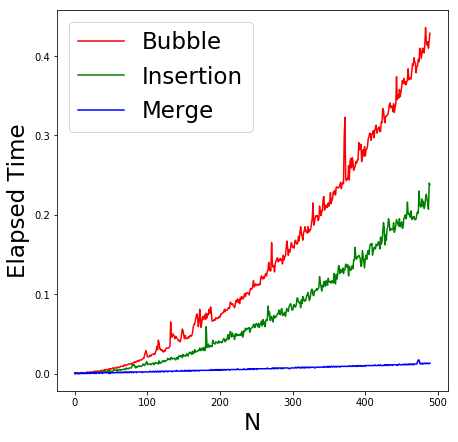

In [6]:
def compute_elapsed_time(func):
    time_hist=[]
    for N in range(10, 500):
        T=mySort.__gen_coords__(N)
        start=time()
        func(T)
        end=time()
        time_pass=end-start
        time_hist.append(time_pass)
    return time_hist

plt.figure(figsize=(7,7))
plt.xlabel('N', fontsize=23)
plt.ylabel('Elapsed Time', fontsize=23)

# It will take at most 3 minutes
plt.plot(compute_elapsed_time(mySort.bubble_sort), c='r',label='Bubble')
plt.plot(compute_elapsed_time(mySort.insert_sort), c='g',label='Insertion')
plt.plot(compute_elapsed_time(mySort.merge_sort), c='b',label='Merge')
plt.legend(fontsize=23)

### Description:

우선 __init__ 으로는 클래스에서 초기조건으로 설정할 것이 아무것도 없기 때문에 pass로 설정한다. 그 다음에 __gen_coords__ 함수를 만들어서 나중에 그래프를 그릴 때 랜덤 배열이 필요하므로 원소의 개수가 N인, 무작위 배열을 만들도록 설정해준다. bubble_sort함수에서는 첫 원소에서 부터 순서대로 2개씩 맞닿은 두 원소의 크기를 서로 비교하며 그때그때 작은것이 앞으로, 큰것이 뒤로 가도록 만든다. insert_sort함수에서는 배열의 크기를 점점 늘려가면서 앞에 있는 원소들과 크기를 비교하여 어느곳에 끼어들어갈지를 결정한다. merge_sort함수에서는 left_half와 right_half로 원소가 한 개만 남을 때까지 나누어 작은것이 앞으로, 큰것이 뒤로 가도록 하고 이것들을 다시 합치는 작업을 반복적으로 하도록 설정한다. 그래프 개형은 이론대로 bubble_sort가 가장 오래 걸렸고, 그 다음으론 insert_sort, 그리고 merge_sort가 가장 빨리 정렬을 하였다.

---------------

### PROBLEM III: Sorting II (40 Points)

Given $\texttt{Doubly Linked List(DLL)}$ (you already implemented in HW3) containing $\underline{N}$ Nodes, 
<br> You want to SORT Nodes which contain strings in $\texttt{dictionary}$ order. 
<br> Moreover, Uppercase letters always precede Lowercase letters. 
<br>
<br>
> For example, given $\texttt{DLL}$ containing ['ahi'] - ['A'] - ['bc'] - ['BD']
<br> $\rightarrow$ ['A'] - ['BD'] - ['ahi'] - ['bc']


<br>
<br>

To this end, 
- Implement $\texttt{(1) Selection Sort}$ , $\texttt{(2) Shell Sort}$ and $\texttt{(3) Quick Sort}$
- Compare their $\texttt{Complexity}$ by plotting the graphs $\underline{Elapsed\;time}$ versus $\underline{N}$ 
- Discuss your results

<br>
$\mathbf{NOTICE}$ : Do Not Use any pre-built Sorting Library. ( e.g. sorted() or numpy.sort() ) 

**Additional Instructions and Tips**
- Use the given $\texttt{dNode}$ class
- Use the built-in functions of the given $\texttt{DLL}$ class <br> ( e.g. is_empty, size, push_back and print_from_front )
- To begin with, You Should implement $\texttt{search_from_front}$ and $\texttt{compare_string}$

> $\texttt{search_from_front}$ takes 'loc' a certain location $\subset$ [1, self.size()] <br> and outputs dNode at 'loc' and the corresponding data

> $\texttt{compare_string}$ takes two strings and compare them.
<br> It outputs **True** if str2 precedes str1 or str1 is equal to str2, **False** if st1 precedes str2.

- Implement $\texttt{compute_elapsed_time}$ by using $\texttt{reset}$ and $\texttt{gen_str}$

<br>
By using $\texttt{search_from_front}$ and $\texttt{compare_string}$,

- Implement $\texttt{select_sort}$
- Implement $\texttt{shell_sort}$ with $\texttt{gap_insertion_sort}$
- Implement $\texttt{_quick_sort_helper}$ with $\texttt{_partition}$

### Answer:

In [7]:
import numpy as np
import string, random
import matplotlib.pyplot as plt
from time import time

class dNode:
    def __init__(self, init_data):
        self.data = init_data
        self.prev = None
        self.next = None
        
class DLL():
    def __init__(self):
        self.head = dNode(None)
        self.tail = dNode(None)
    def is_empty(self):
        return self.head.next == None
    def size(self):
        if self.is_empty(): return 0
        else:
            current = self.head
            cnt = 0
            while current.next != self.tail:
                cnt += 1
                current = current.next
            return cnt
    def push_back(self, item):
        tmp=dNode(item)
        if self.is_empty():
            self.head.next = tmp
            self.tail.prev = tmp
            tmp.next = self.tail
            tmp.prev = self.head
        else:
            current=self.tail.prev
            self.tail.prev = tmp
            tmp.next = self.tail
            tmp.prev = current
            current.next = tmp
    def print_from_front(self):
        if self.is_empty():
            print('Print Error : The List is empty')
        else:
            current = self.head
            print('Stored data(Foward) : ',end = '')
            while True:
                current = current.next
                if current == self.tail: break
                print(current.data, end=' ')
            print('')
    def search_from_front(self,loc):
        if self.is_empty() or loc > self.size() or loc<=0:
            print('Search Error')
            return None
        else:
            current=self.head
            for i in range(loc):
                current=current.next
            return current.data
        
    def compare_string(self, str1, str2):
        L1=len(str1)
        L2=len(str2)
        L=min(L1,L2)
        i=0
        stop=False
        while i<L and not stop:
            if i<L-1:
                if str1[i]>str2[i]:
                    stop=True
                    return True
                if str1[i]<str2[i]:
                    stop=True
                    return False
                else:
                    i+=1
            else:
                if str1[i]>=str2[i]:
                    return True
                else:
                    return False
    
    def select_sort(self):
        if self.size()==0:
            return None
        
        else:
            for full in range(self.size(),1,-1):
                max_value=self.search_from_front(1)
                index=1
                for i in range(2,full+1):
                    current_value=self.search_from_front(i)
                    if self.compare_string(current_value,max_value):
                        index=i
                        max_value=current_value
                
                max_value=self.search_from_front(index)
                end_value=self.search_from_front(full)
                current=self.head
                current=current.next
                for i in range(1,self.size()+1):
                    if i==index:
                        current.data=end_value
                    if i==full:
                        current.data=max_value
                    current=current.next
            
    def shell_sort(self):
        if self.size()==0:
            return None
        else:
            sublist_count=self.size()//2
            while sublist_count>0:
                for start_position in range(1,sublist_count+1):
                    self.gap_insertion_sort(start_position,sublist_count)
                
                sublist_count=sublist_count//2
    def gap_insertion_sort(self,start,gap):
        for i in range(start+gap,self.size()+1,gap):
            current_value=self.search_from_front(i)
            position=i
            while position-1>=gap:
                current1=self.head
                back_value=self.search_from_front(position-gap)
                if self.compare_string(back_value,current_value):
                    for j in range(position):
                        current1=current1.next
                    current1.data=back_value
                    position-=gap
                else:
                    break
                    
            current2=self.head
            for k in range(position):
                current2=current2.next
            current2.data=current_value
            
    def quick_sort(self):
        self._quick_sort_helper(1, self.size())
    def _quick_sort_helper(self, first, last):
        if first<last:
            split_point=self._partition(first,last)
            self._quick_sort_helper(first,split_point-1)
            self._quick_sort_helper(split_point+1,last)
    def _partition(self, first, last):
        pivot_value=self.search_from_front(first)
        left_mark=first+1
        right_mark=last
        done=False
        while not done:
            while left_mark<=right_mark:
                L=self.search_from_front(left_mark)
                if self.compare_string(pivot_value,L):
                    left_mark+=1
                else:
                    break
                    
            while right_mark>=left_mark:
                R=self.search_from_front(right_mark)
                if self.compare_string(R,pivot_value):
                    right_mark-=1
                else:
                    break
                    
            if right_mark<left_mark:
                done=True
                
            else:
                current=self.head
                current=current.next
                for i in range(1,self.size()+1):
                    if i==left_mark:
                        current.data=R
                    if i==right_mark:
                        current.data=L
                    current=current.next
        
        R=self.search_from_front(right_mark)
        current=self.head
        current=current.next
        for j in range(1,self.size()+1):
            if j==first:
                current.data=R
            if j==right_mark:
                current.data=pivot_value
            current=current.next
            
        return right_mark
    
    def __reset__(self):
        self.head=dNode(None)
        self.tail=dNode(None)
    def __gen_str__(self, N):
        self.__reset__()
        letters = string.ascii_letters
        for i in range(N):
            self.push_back(''.join(random.choice(letters) for i in range(5)))
    def compute_elapsed_time(self, sort_name):
        time_hist=[]
        for N in range(10, 150):
            self.__gen_str__(N)

            if sort_name=='select':
                start=time()
                self.select_sort()
                end=time()
                
            if sort_name=='shell':
                start=time()
                self.shell_sort()
                end=time()
                
            if sort_name=='quick':
                start=time()
                self.quick_sort()
                end=time()
                
            time_pass=end-start
            time_hist.append(time_pass)
        return time_hist

Stored data(Foward) : redvelvet TWICE twice iu 
Stored data(Foward) : TWICE iu redvelvet twice 

Stored data(Foward) : redvelvet TWICE twice iu 
Stored data(Foward) : TWICE iu redvelvet twice 

Stored data(Foward) : redvelvet TWICE twice iu 
Stored data(Foward) : TWICE iu redvelvet twice 



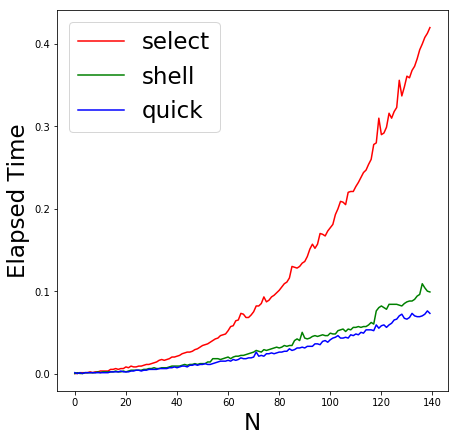

In [8]:
# Sanity Check
myDLL = DLL()
myDLL.push_back('redvelvet')
myDLL.push_back('TWICE')
myDLL.push_back('twice')
myDLL.push_back('iu')
myDLL.print_from_front()
myDLL.select_sort()
myDLL.print_from_front()
print()
myDLL = DLL()
myDLL.push_back('redvelvet')
myDLL.push_back('TWICE')
myDLL.push_back('twice')
myDLL.push_back('iu')
myDLL.print_from_front()
myDLL.shell_sort()
myDLL.print_from_front()
print()
myDLL = DLL()
myDLL.push_back('redvelvet')
myDLL.push_back('TWICE')
myDLL.push_back('twice')
myDLL.push_back('iu')
myDLL.print_from_front()
myDLL.quick_sort()
myDLL.print_from_front()
print()


plt.figure(figsize=(7,7))
plt.xlabel('N', fontsize=23)
plt.ylabel('Elapsed Time', fontsize=23)

# It will take at most 3 minutes 
plt.plot(myDLL.compute_elapsed_time('select'), c='r',label='select')
plt.plot(myDLL.compute_elapsed_time('shell'), c='g',label='shell')
plt.plot(myDLL.compute_elapsed_time('quick'), c='b',label='quick')
plt.legend(fontsize=23)

### Description:

우선 compare_string 함수를 만들어서 str1이 str2보다 뒤에 위치해야 할 경우를 True로 만들고, push_back함수를 통해 원소가 뒤에서부터 추가되고, 가장 많이 쓰이는 search_from_front 함수를 통해 몇 번째에 어떤 원소가 있는지를 확인하도록 하였다. select_sort 함수에서는 앞에서부터 가장 뒤로 가야할 원소를 찾은 후 뒤에있는 원소와 뒤바꾼다. shell_sort 함수에서는 여러개의 sublist를 만들어 그 내에서 순서대로 배열을 하고 그 후에 insertion sort를 한다. quick_sort 함수에서는 맨 앞에 있는 원소를 pivot_value로 정하고 left_mark와 right_mark가 교차하는 지점에서 right_mark에 그 값을 넣어준다. 그래프는 우리가 배웠던 이론대로 select_sort가 가장 오래 걸리도록 나왔고, quick_sort가 가장 짧게 걸리도록 나왔고, shell_sort가 quick_sort와 비슷하지만 살짝 더 오래 걸리도록 나왔다.

---------------